<table align="center" width=100%>
        <td>
            <div align="center">
                <font color="#21618C" size=5px>
                    <b>LOAN DATASET CASE STUDY
                    </b>  
                </font>
            </div>
        </td>

<a id="statement"><a>
## Problem Statement:
In this Case study we need to use Loans dataset with the aim to identify variables which indicate if a person is likely to default.With the Exploratory Data Analysis here, we have to identify the risky loan applicants to avoid any financial loss to the company.


<a id="discription"><a>
## DataSet Description :
It contains the complete loan data for all loans issued through the time period 2007 to 2011.

<a id="dictionary"><a>
## Data Dictionary :
* **annual_inc** - The self-reported annual income provided by the borrower during registration.
* **dti** - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan,divided by the borrower’s self-reported monthly income.
* **emp_length** -Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* **funded_amnt** - The total amount committed to that loan at that point in time.
* **funded_amnt_inv** -The total amount committed by investors for that loan at that point in time.
* **grade** - LC assigned loan grade
* **id** - A unique LC assigned ID for the loan listing.
* **installment** - The monthly payment owed by the borrower if the loan originates.
* **int_rate** - Interest Rate on the loan
* **last_pymnt_amnt**-Last total payment amount received
* **last_pymnt_d** -Last month payment was received
* **loan_amnt** -The listed amount of the loan applied for by the borrower. If atsome point in time, the credit departmentreduces the loan amount, then it will be reflected in this value.
* **loan_status** - Current status of the loan
* **member_id** -A unique LC assigned Id for the borrower member.
* **purpose** - A category provided by the borrower for the loan request.
* **term** -The number of payments on the loan. Values are in months and can be either 36 or 60.
* **total_acc** -The total number of credit lines currently in the borrower's credit file
* **total_pymnt** -Payments received to date for total amount funded
* **total_pymnt_inv** -Payments received to date for portion of total amount funded by investors
* **total_rec_int** -Interest received to date

<a id="data"><a>
## Understanding the data


### Import the libraries

In [2]:
# Import the required libraries
import numpy as np # Import numpy library to perform mathematical functions
import pandas as pd # Import pandas to perform operations on dataset
import matplotlib.pyplot as plt # Import matplotlib for visualization tools
import seaborn as sns # Import seaborn for advanced visualization tools
import warnings # Import warnings library 
warnings.filterwarnings('ignore') # Ignore warnings during code execution

### Import the dataset 

In [3]:
#Importing the data file
df = pd.read_csv("loan.csv")
df

#To understand the data extract the first five rows using head function
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


### No. Of rows and Columns

In [4]:
print ("Number of rows -",len(df)) # print no of rows
print("Number of columns -",len(df.columns)) # print no of columns

Number of rows - 39717
Number of columns - 23


### Conversion of Character type into float type

#### ‘Int_rate’ column is character type. converting it into float type.

In [5]:
#‘Int_rate’ column is character type. With the help of lambda function convert into float type.
df['int_rate']= df["int_rate"].apply(lambda x : float(x.strip("%")))
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

### To display the  datatype of each column

In [6]:
# To display the type of data in each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

<a id="Cleandata"><a>
## Cleaning the data

### Removing the columns having complete NaN value in the entire dataset.

In [7]:
#At first,removing the columns having complete NaN value in the entire dataset

df.drop(["Unnamed: 21","Unnamed: 22"],axis=1,inplace=True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,4 years,...,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,3 years,...,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,< 1 year,...,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,< 1 year,...,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00


#### Checking null values in pending columns

In [8]:
#Checking null values in pending columns
df.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1075
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
last_pymnt_d             71
last_pymnt_amnt           0
dtype: int64

###  Filtering  the ‘Emp_Len’ column to extract the numerical value from the string. 
### such that < 1year, 2 years , 3 years as 1 , 2, 3 so on

#### Converting emp_length column that was in string to float datatype

In [9]:
#Converting emp_length column that was in string to float datatype 
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
df["emp_length"]

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

####  Plot a box plot to visualize the distribution of the emp_length attribute

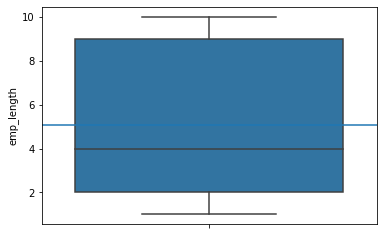

In [10]:
# Plot a box plot to visualize the distribution of the emp_length attribute
sns.boxplot(y=df.emp_length)

# Display the mean line in the plot
plt.axhline(y=df.emp_length.mean())

Since , the mean and median line are close to each other we can use mean to impute the null values.

#### Imputing the null values

In [11]:
#Impute null values in emp_length column with mean value
df.emp_length.fillna(df.emp_length.mean(),inplace=True)

#Impute null values in last_pymnt_d column with mode value
df.last_pymnt_d.fillna(df.last_pymnt_d.mode().values[0],inplace=True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10.0,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,1.0,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10.0,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10.0,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1.0,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,4.0,...,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,3.0,...,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,1.0,...,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,1.0,...,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00


#### Checking pending null values

In [12]:
#Checking pending null values
df.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
dtype: int64

### Preprocessing and finding insights

#### Find the value counts of the ‘loan_status’

In [13]:
# count of each status in loan_status column
df["loan_status"].value_counts() 

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Filter only the ‘fully paid’ and ‘charged off’ categories

In [14]:
# Filter out fully paid and charged off categories
d=df[df["loan_status"] != "Current"] 

#### After filtering fully paid’ and ‘charged off’ categories

In [15]:
#count of each status in loan_status column after removing current value
d["loan_status"].value_counts() 

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Removing the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

#### Removing the month from the ‘term’ column

In [16]:
# Remove month from term column using lambda function
df["term"]=df["term"].apply(lambda x: float(x.strip(' ')[0:2])) 
df["term"]

0        36.0
1        60.0
2        36.0
3        36.0
4        60.0
         ... 
39712    36.0
39713    36.0
39714    36.0
39715    36.0
39716    36.0
Name: term, Length: 39717, dtype: float64

###  Creating a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria - If loan_amnt is less than equals to funded_amnt then ‘0’ else ‘1’.

In [17]:
#setting loan amount to 0 if it is less than funded_amnt using lambda function
df["risky_loan_applicant"] = df.apply(lambda x : 0 if x["loan_amnt"] <= x["funded_amnt"] else 1,axis=1) 
df["risky_loan_applicant"]

0        0
1        0
2        0
3        0
4        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: risky_loan_applicant, Length: 39717, dtype: int64

In [18]:
df["risky_loan_applicant"].value_counts()

0    37868
1     1849
Name: risky_loan_applicant, dtype: int64

### Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status . Write the observation from each graph.

#### Barplot loan_status vs grade

<AxesSubplot:xlabel='loan_status'>

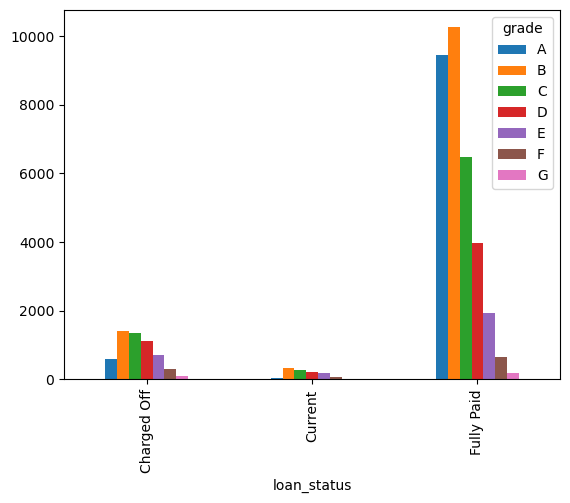

In [56]:
# plot bar plot using loan status vs grade
pd.crosstab(df['loan_status'],df['grade']).plot(kind='bar')

Above plot shows more no of people fall under grade B of each loan status so we conclude that people in Grade B are at the less risk criteria. Grades are given based on credit score of the person where grade A have the lowest expected risk of loss and G have the highest expected risk of loss so special attention need to be given while granting loans to people in grade G.


### Barplot loan_status vs term

<AxesSubplot:xlabel='loan_status'>

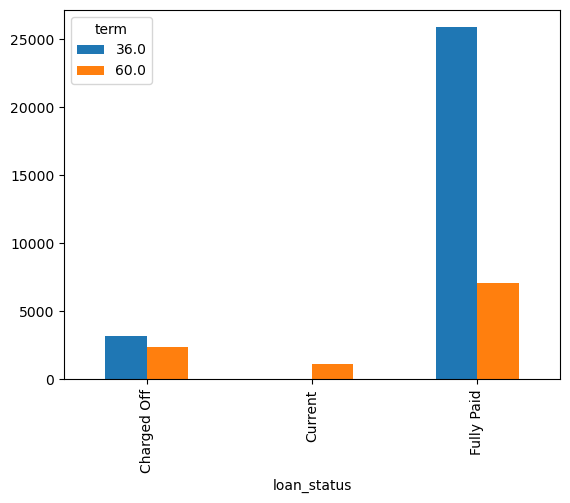

In [57]:
#plot bar plot using loan status vs term
pd.crosstab(df['loan_status'],df['term']).plot(kind='bar') 

Above plot shows most of the fully paid  and charged off loan status comes under 36 months term duration and few of them have paid their loan in 60 months duration, current loan status shows every person opted for 60 months term duration and none of the current loan status falls in 36 months duration. count of charged off status is less when compared to fully paid.so It shows that 20% people are at high risk.

### Barplot loan_status vs verification_status

<AxesSubplot:xlabel='loan_status'>

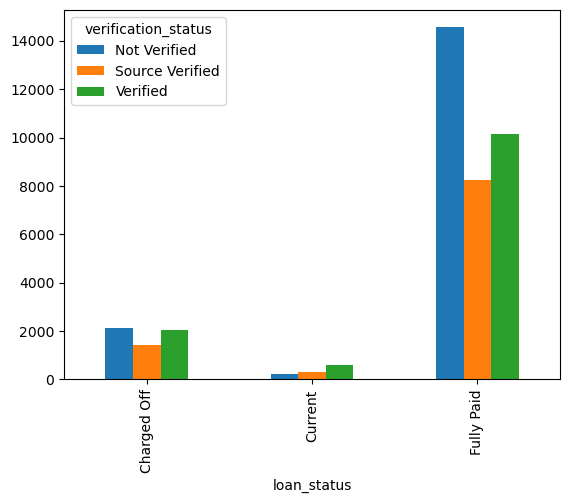

In [58]:
#plot bar plot using loan status vs verification status
pd.crosstab(df['loan_status'],df['verification_status']).plot(kind='bar') 

* From the above graph we can see that among the people who are in charged off status,the count of people who have not verified and those who have verified seems to be almost same.
* Also it is conclusive that there are high number of people who have fully paid the loan amount, eventhough the number of people who have source verified their status seems to be lesser than the ones who have not verified their loan status

#### converting  the ‘emp_len’ column into categorical column

#### If emp_len is less than equals to 1 then  ‘fresher’.

#### If emp_len is greater than 1 and less than 3 then ‘junior’.

#### If emp_len is greater than 3 and less than 7 then ‘senior’

#### If emp_len is greater than 7 then ‘expert’.

In [59]:
# defining a function
def fun(x): 
    if x <= 1:
        return "fresher"
    elif x > 1 and x < 3:
        return "junior"
    elif x > 3 and x < 7:
        return "senior"
    else:
        return "expert"
# applying user defined function in emp_length table   
df["emp_length"] = df["emp_length"].apply(fun)
df["emp_length"]

0         expert
1        fresher
2         expert
3         expert
4        fresher
          ...   
39712     senior
39713     expert
39714    fresher
39715    fresher
39716    fresher
Name: emp_length, Length: 39717, dtype: object

### sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot.

#### sum of ‘loan_amnt’ for each grade

In [60]:
# extract sum of loan amount based on grade
grade_sum =  df.groupby("grade")["loan_amnt"].sum()
grade_sum

grade
A     86982400
B    133651350
C     89115825
D     65160400
E     45037900
F     19263100
G      6391675
Name: loan_amnt, dtype: int64

#### Distribution using Pie plot

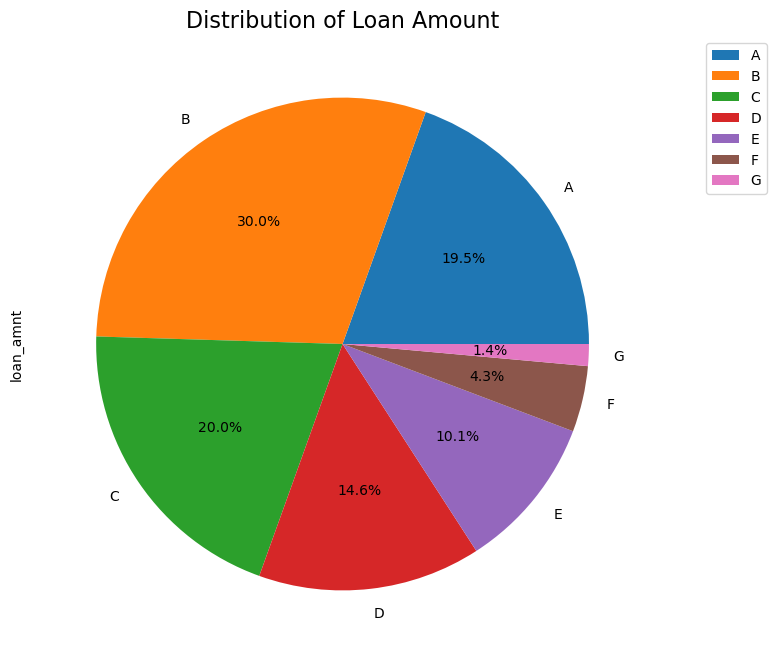

In [61]:
plt.figure(figsize=(8, 8)) # Figure size 

plt.title("Distribution of Loan Amount", fontsize=16) # Display title in the given font size
pie = grade_sum.plot(kind="pie", autopct='%1.1f%%') # plot a pie plot using sum of loan amount for each grade

plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1)) # Display each grades on top right

plt.show() # display the plot


From the graph it can be concluded that grade B has the highest percentage and grade G has the lowest percentage of loan amount.

<a id="conclusion"> <a>
# Conclusion

* In this Case study we were provided with Loans dataset with the aim to identify variables which indicate if a person is likely to default.So,we have to identify the risky loan applicants to avoid any financial loss to the company.
* Here we have performed discriptive analysis of the data set using python libraries to clean , process, analyse and visualize the data and has provided some insightful information of risky applicants to the company to prevent them from any financial loss in future.
* We have compared loan status of people with grades,term duration and verification status using graphs.From the graph we found that for each status the count of risky loan applicants are comparatively less when we compare them to the people paying their debts regularly without any lag.
* People with grade G has the lowest credit score and they are provided with lowest percentage of loan amount. We can see from the graphs that those people falls under grade G are less and they likely to violate. It is better to perform a complete verification and documentation for grade G people before giving loans because they can be potential risky applicants in future.